# Seaborn Plotting Funkcije

## Seminarski rad - SISJ

### Deo 2: Plotting funkcije i njihove mogućnosti

---

## 1. Uvod u Seaborn Plotting Funkcije

Seaborn organizuje plotting funkcije u **dva nivoa**:

#### **Figure-level functions**
- Kreiraju kompletnu matplotlib figuru
- Podržavaju automatski layout
- **Primeri**: `relplot()`, `displot()`, `catplot()`

#### **Axes-level functions**  
- Rade sa jednim axes objektom
- Mogu se kombinovati sa matplotlib
- **Primeri**: `scatterplot()`, `lineplot()`, `histplot()`

### Kategorije plotting funkcija:

| **Tip** | **Svrha** | **Figure-level** | **Axes-level** |
|---------|-----------|------------------|----------------|
| 📊 **Relational** | Odnosi između varijabli | `relplot()` | `scatterplot()`, `lineplot()` |
| 📈 **Distribution** | Distribucije podataka | `displot()` | `histplot()`, `kdeplot()` |
| 📋 **Categorical** | Kategorijski podaci | `catplot()` | `boxplot()`, `barplot()` |
| 📉 **Regression** | Regresijska analiza | `lmplot()` | `regplot()` |

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_theme()

tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
flights = sns.load_dataset('flights')

print(f"Tips dataset: {tips.shape}")
print(f"Iris dataset: {iris.shape}")  
print(f"Flights dataset: {flights.shape}")

Tips dataset: (244, 7)
Iris dataset: (150, 5)
Flights dataset: (144, 3)


## 2. Relational Plots - Odnosi između varijabli

Relational plots prikazuju odnose između dve ili više kontinuiranih varijabli.

### 2.1 Scatter Plot - tačkasti dijagram

**Idealan za:**
- Korelacije između varijabli
- Otkrivanje outlier-a  
- Mapiranje dodatnih varijabli preko boje/veličine

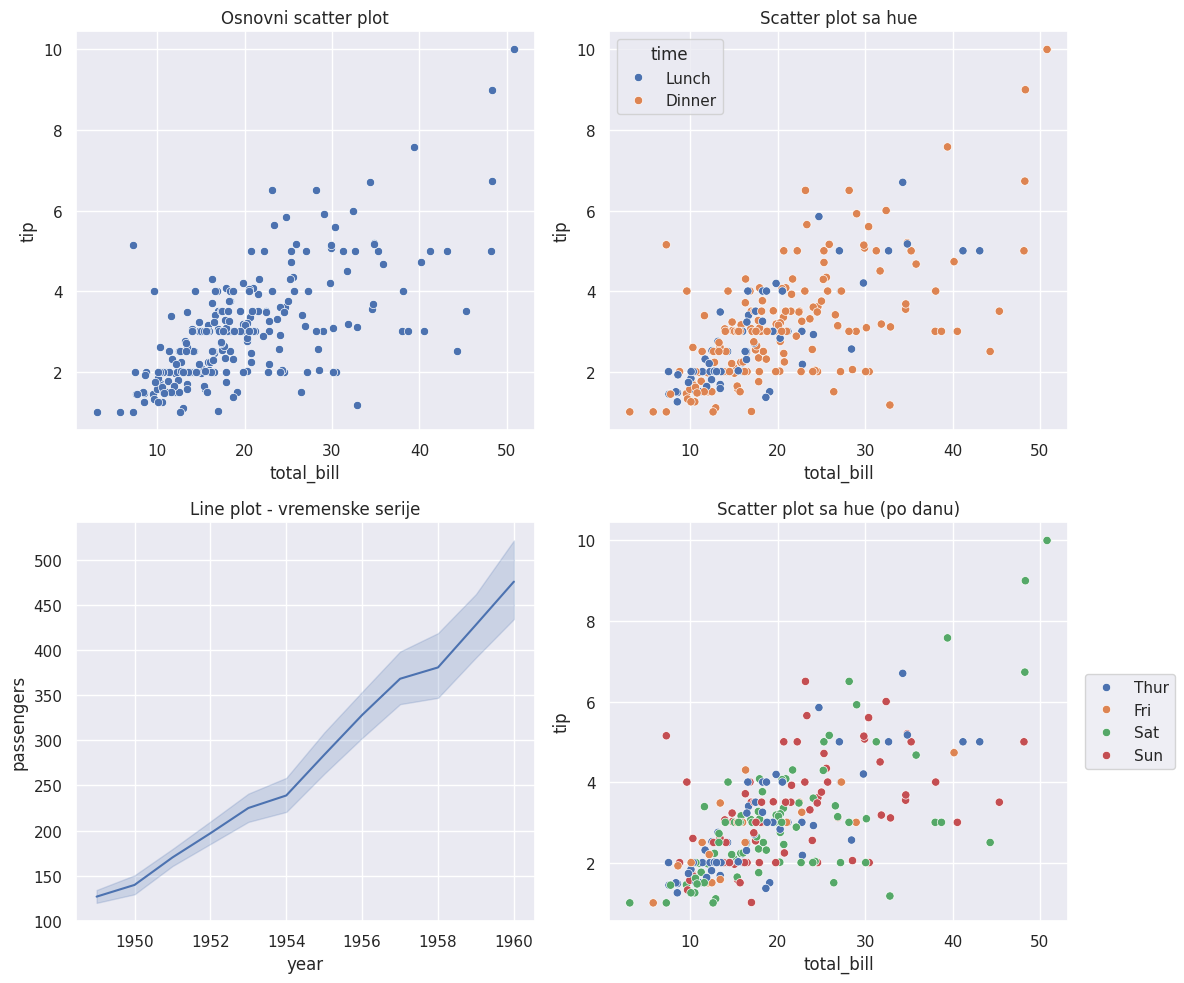

Korelacija total_bill vs tip: 0.676
→ Pozitivna korelacija: veći račun = veća napojnica


In [33]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Osnovni scatter plot
sns.scatterplot(data=tips, x='total_bill', y='tip', ax=axes[0,0])
axes[0,0].set_title('Osnovni scatter plot')

# 2. Scatter sa bojom (hue)
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', ax=axes[0,1])
axes[0,1].set_title('Scatter plot sa hue')

# 3. Line plot
sns.lineplot(data=flights, x='year', y='passengers', ax=axes[1,0])
axes[1,0].set_title('Line plot - vremenske serije')

# 4. Axes-level scatter sa facet-like bojom (hue)
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day', ax=axes[1,1])
axes[1,1].set_title('Scatter plot sa hue (po danu)')
axes[1,1].legend(loc='center left', bbox_to_anchor=(1.02, 0.5))

plt.tight_layout()
plt.show()

# Analiza korelacije
corr = tips['total_bill'].corr(tips['tip'])
print(f"Korelacija total_bill vs tip: {corr:.3f}")
print("→ Pozitivna korelacija: veći račun = veća napojnica")

## 3. Distribution Plots - Analiza distribucija

Distribution plots prikazuju kako se vrednosti raspoređuju.

### 3.1 Tipovi:

- **Histogram** - frekvencije u binovima
- **KDE** - smooth procena distribucije  
- **Box Plot** - kvartili i outlier-i
- **Violin Plot** - oblik + statistike

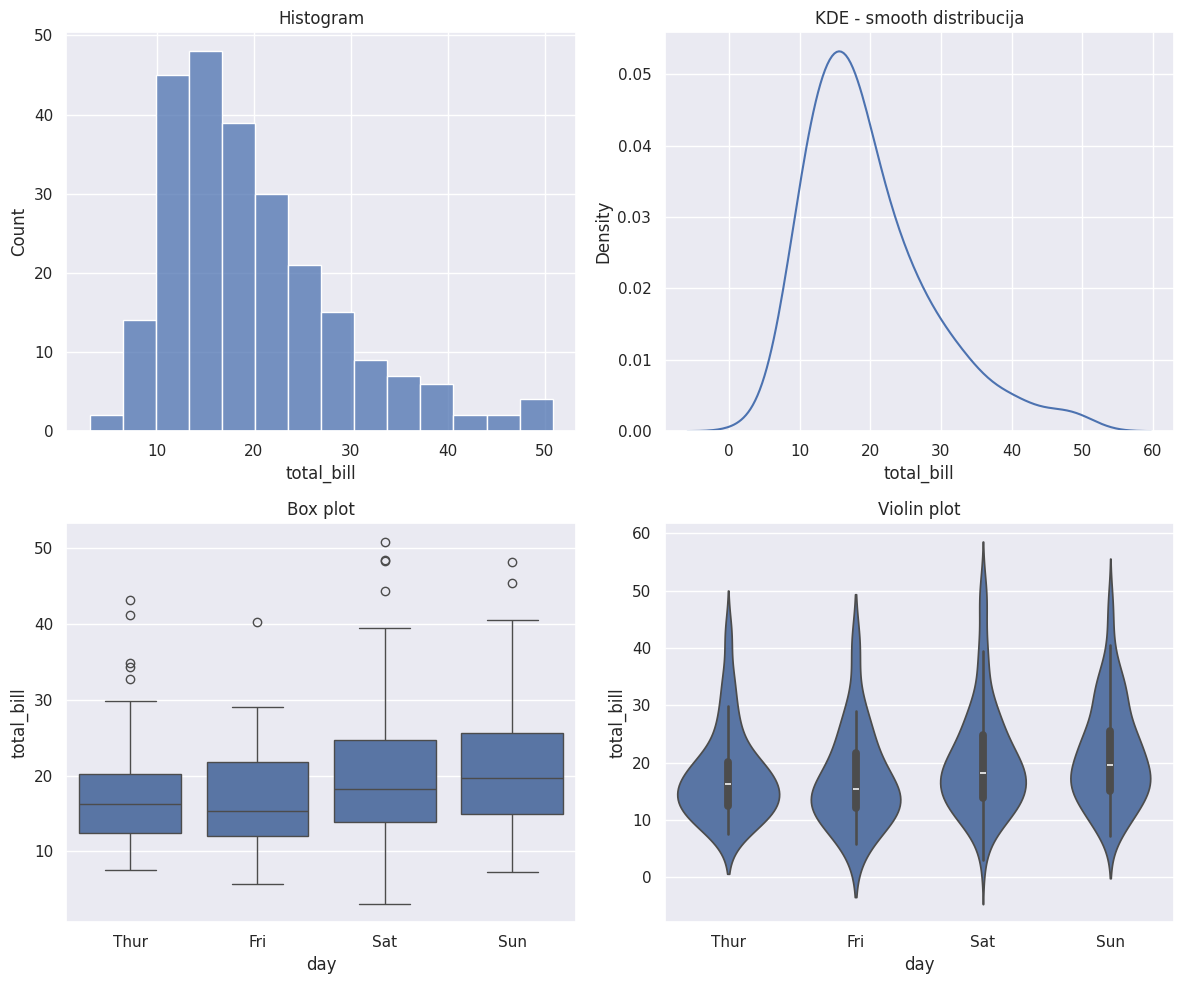

Distribucijska analiza total_bill:
Srednja vrednost: $19.79
Medijan: $17.80
Standardna devijacija: $8.90
Broj outlier-a: 9


In [34]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Histogram
sns.histplot(data=tips, x='total_bill', ax=axes[0,0])
axes[0,0].set_title('Histogram')

# 2. KDE plot
sns.kdeplot(data=tips, x='total_bill', ax=axes[0,1])
axes[0,1].set_title('KDE - smooth distribucija')

# 3. Box plot
sns.boxplot(data=tips, x='day', y='total_bill', ax=axes[1,0])
axes[1,0].set_title('Box plot')

# 4. Violin plot
sns.violinplot(data=tips, x='day', y='total_bill', ax=axes[1,1])
axes[1,1].set_title('Violin plot')

plt.tight_layout()
plt.show()

# Statistike
print("Distribucijska analiza total_bill:")
print(f"Srednja vrednost: ${tips['total_bill'].mean():.2f}")
print(f"Medijan: ${tips['total_bill'].median():.2f}")
print(f"Standardna devijacija: ${tips['total_bill'].std():.2f}")

# Outlier-i
Q1 = tips['total_bill'].quantile(0.25)
Q3 = tips['total_bill'].quantile(0.75)
IQR = Q3 - Q1
outliers = tips[(tips['total_bill'] < Q1 - 1.5*IQR) | 
                (tips['total_bill'] > Q3 + 1.5*IQR)]
print(f"Broj outlier-a: {len(outliers)}")

## 4. Categorical Plots - Kategorijski podaci

Categorical plots prikazuju odnose između kategorijskih i numeričkih varijabli.

### 4.1 Tipovi:

- **Strip Plot** - sve tačke prikazane
- **Box Plot** - kvartili i outlier-i  
- **Bar Plot** - prosečne vrednosti
- **Count Plot** - broj opservacija

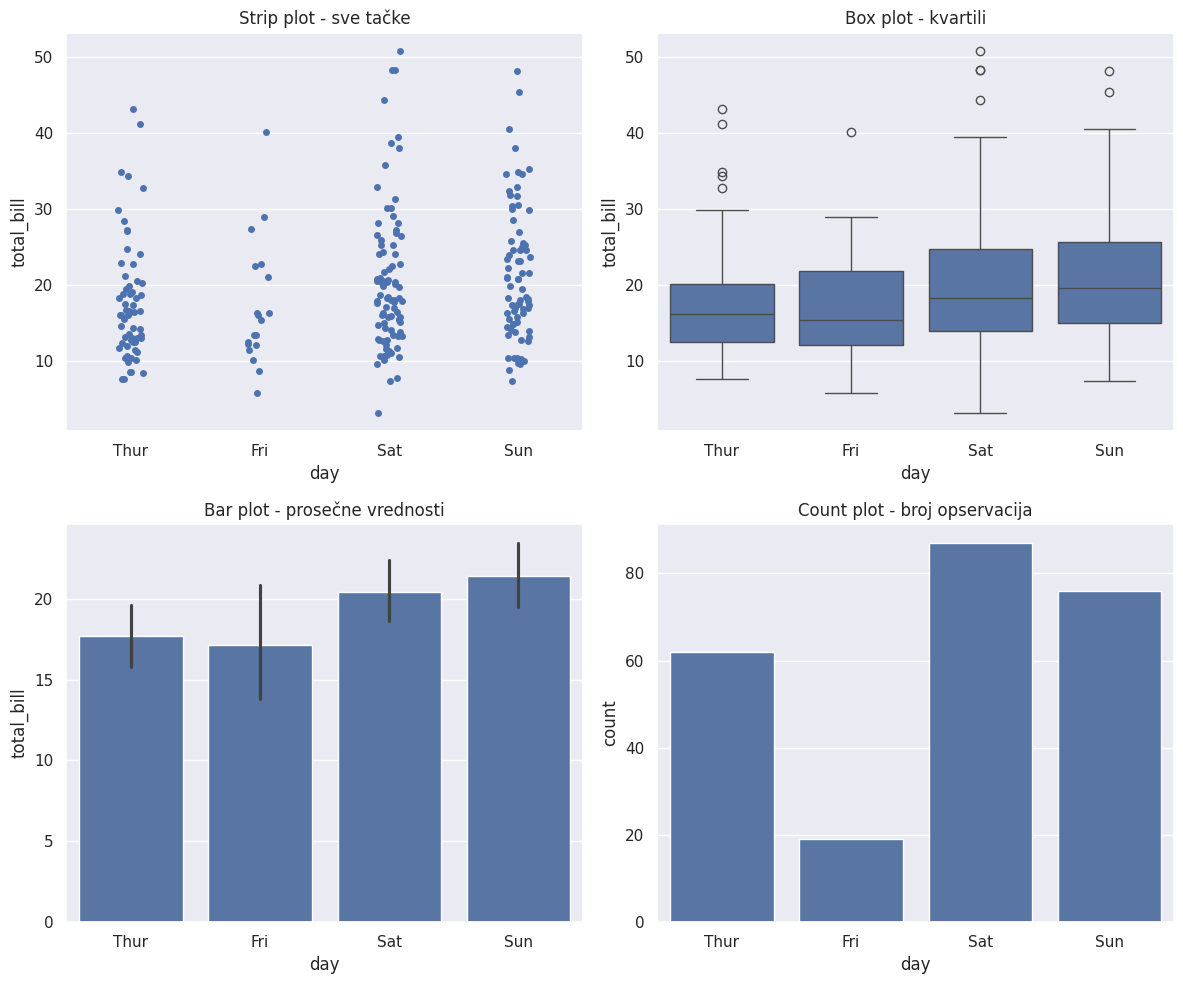

Analiza po danima:
Thur: $17.68 prosek, 62.0 gostiju
Fri: $17.15 prosek, 19.0 gostiju
Sat: $20.44 prosek, 87.0 gostiju
Sun: $21.41 prosek, 76.0 gostiju


/tmp/ipykernel_58767/4080283500.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_stats = tips.groupby('day')['total_bill'].agg(['mean', 'count'])


In [35]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Strip plot - sve tačke
sns.stripplot(data=tips, x='day', y='total_bill', ax=axes[0,0])
axes[0,0].set_title('Strip plot - sve tačke')

# 2. Box plot 
sns.boxplot(data=tips, x='day', y='total_bill', ax=axes[0,1])
axes[0,1].set_title('Box plot - kvartili')

# 3. Bar plot - proseci
sns.barplot(data=tips, x='day', y='total_bill', ax=axes[1,0])
axes[1,0].set_title('Bar plot - prosečne vrednosti')

# 4. Count plot - frekvencije
sns.countplot(data=tips, x='day', ax=axes[1,1])
axes[1,1].set_title('Count plot - broj opservacija')

plt.tight_layout()
plt.show()

# Analiza po danima
day_stats = tips.groupby('day')['total_bill'].agg(['mean', 'count'])
print("Analiza po danima:")
for day, stats in day_stats.iterrows():
    print(f"{day}: ${stats['mean']:.2f} prosek, {stats['count']} gostiju")

## 5. Regression Plots - Regresijska analiza

Regression plots kombinuju scatter plot sa regresijskim linijama.

### 5.1 Funkcije:
- **regplot()** - osnovni regresijski plot
- **lmplot()** - figure-level verzija
- **residplot()** - analiza grešaka modela

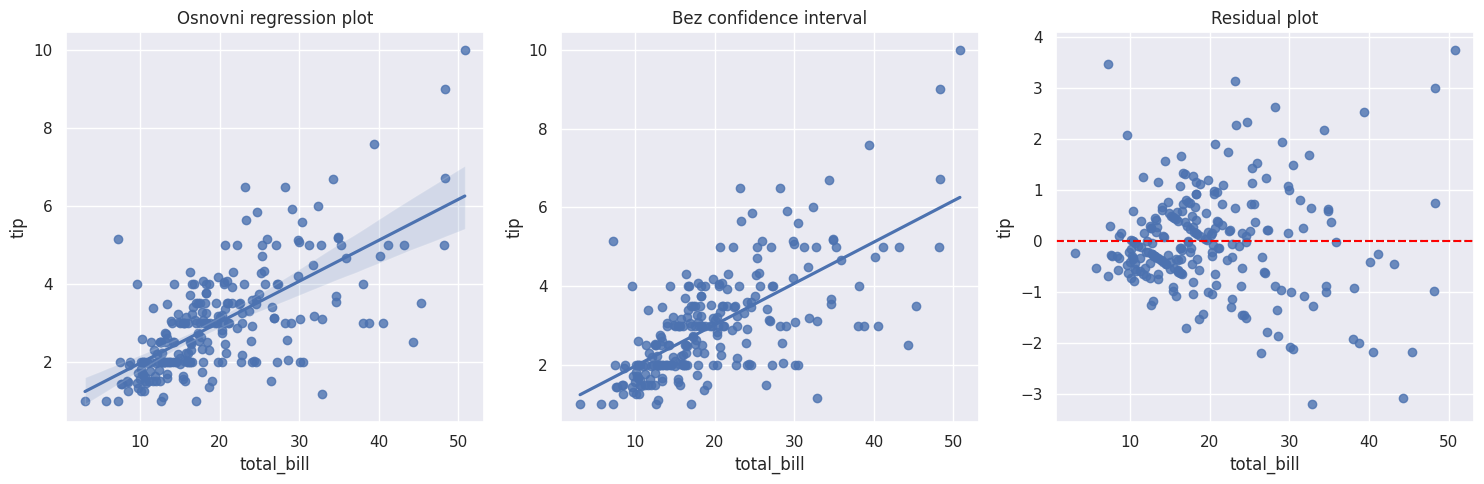

Regresijska analiza:
Slope (nagib): 0.105
R² (determinacija): 0.457
P-vrednost: 6.69e-34
Interpretacija:
Za svaki $1 povećanja računa, napojnica raste za $0.11
Model objašnjava 45.7% varijanse u napojnicama


In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Osnovni regplot
sns.regplot(data=tips, x='total_bill', y='tip', ax=axes[0])
axes[0].set_title('Osnovni regression plot')

# 2. Regplot bez confidence interval
sns.regplot(data=tips, x='total_bill', y='tip', ci=None, ax=axes[1])
axes[1].set_title('Bez confidence interval')

# 3. Residual plot za dijagnostiku
sns.residplot(data=tips, x='total_bill', y='tip', ax=axes[2])
axes[2].set_title('Residual plot')
axes[2].axhline(y=0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

# Regresijska statistika
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(tips['total_bill'], tips['tip'])

print("Regresijska analiza:")
print(f"Slope (nagib): {slope:.3f}")
print(f"R² (determinacija): {r_value**2:.3f}")
print(f"P-vrednost: {p_value:.2e}")
print(f"Interpretacija:")
print(f"Za svaki $1 povećanja računa, napojnica raste za ${slope:.2f}")
print(f"Model objašnjava {r_value**2*100:.1f}% varijanse u napojnicama")

## 6. Matrix Plots - Matrice podataka

Matrix plots prikazuju 2D matrice podataka kroz boje.

### 6.1 Funkcije:
- **heatmap()** - osnovni heatmap
- **clustermap()** - heatmap sa klasterovanjem

/tmp/ipykernel_58767/2893503340.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = tips.pivot_table(values='tip', index='day',


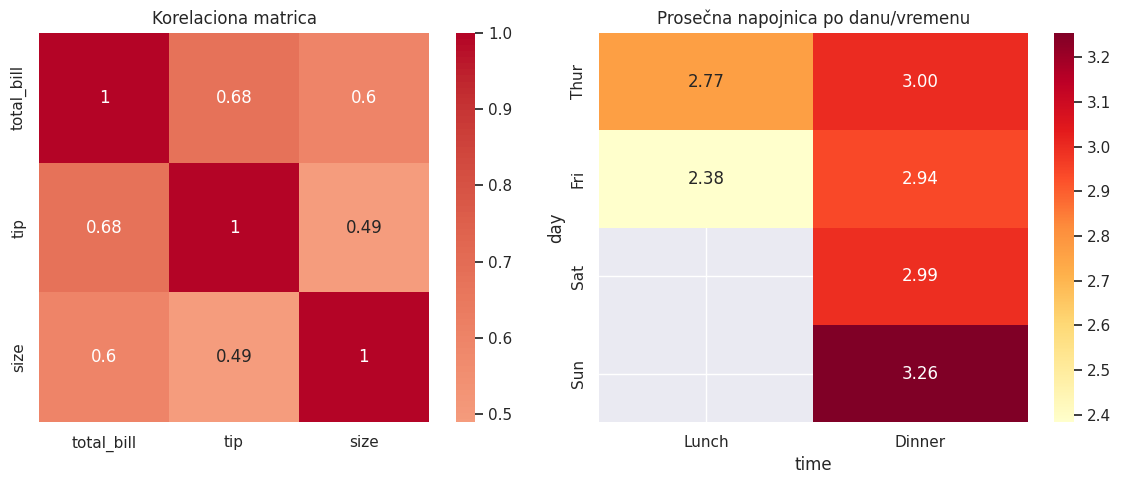

Najjača korelacija:
total_bill ↔ tip: 0.676


In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1. Korelaciona matrica
numeric_columns = tips.select_dtypes(include=[np.number]).columns
correlation_matrix = tips[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
            center=0, square=True, ax=axes[0])
axes[0].set_title('Korelaciona matrica')

# 2. Pivot tabela heatmap
pivot_table = tips.pivot_table(values='tip', index='day', 
                               columns='time', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt='.2f', 
            cmap='YlOrRd', ax=axes[1])
axes[1].set_title('Prosečna napojnica po danu/vremenu')

plt.tight_layout()
plt.show()

print("Najjača korelacija:")
# Pronađi najjaču korelaciju (osim dijagonale)
corr_values = correlation_matrix.values
np.fill_diagonal(corr_values, np.nan)
max_corr_idx = np.nanargmax(np.abs(corr_values))
row, col = np.unravel_index(max_corr_idx, corr_values.shape)
max_corr = corr_values[row, col]
var1 = correlation_matrix.index[row]
var2 = correlation_matrix.columns[col]
print(f"{var1} ↔ {var2}: {max_corr:.3f}")

## 7. Figure-level vs Axes-level

### Kada koristiti koji nivo:

**Figure-level functions:**
- Kada trebate automatski layout
- Za faceting (podela po kategorijama) 
- Za brze eksplorativne analize

**Axes-level functions:**
- Za preciznu kontrolu
- Kada kombinujete sa matplotlib
- Za custom layout-e

### Primer - isti plot, različiti nivoi:

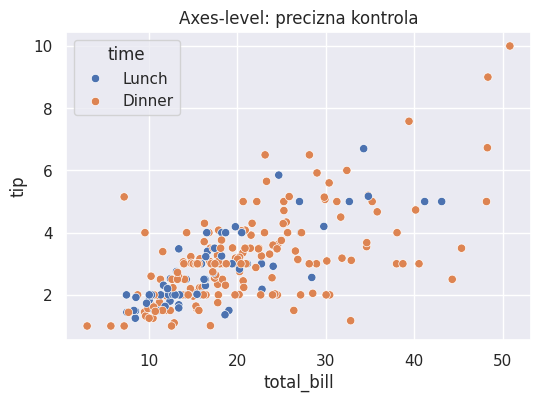

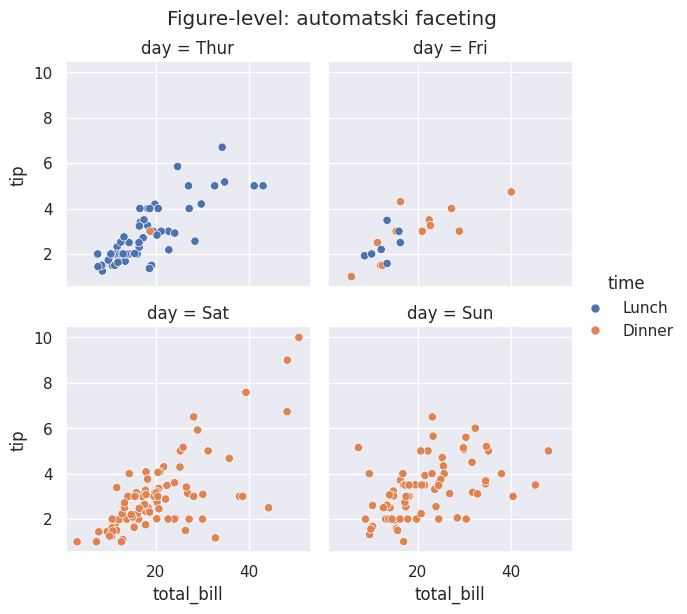

Ključne razlike:
 Figure-level: automatski layout, lako faceting
 Axes-level: precizna kontrola, matplotlib integracija
Preporuke:
→ Koristite figure-level za brze analize
→ Koristite axes-level za precizne postavke


In [38]:
# Figure-level vs Axes-level poređenje

# 1. Axes-level - precizna kontrola
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', ax=ax)
ax.set_title('Axes-level: precizna kontrola')
plt.show()

# 2. Figure-level sa faceting
g = sns.relplot(data=tips, x='total_bill', y='tip', hue='time', 
                col='day', col_wrap=2, kind='scatter', height=3)
g.fig.suptitle('Figure-level: automatski faceting', y=1.02)
plt.show()

print("Ključne razlike:")
print(" Figure-level: automatski layout, lako faceting")  
print(" Axes-level: precizna kontrola, matplotlib integracija")
print("Preporuke:")
print("→ Koristite figure-level za brze analize") 
print("→ Koristite axes-level za precizne postavke")

## 8. Zaključak

### Pregled plotting funkcija:

| **Kategorija** | **Figure-level** | **Axes-level** | **Kada koristiti** |
|----------------|------------------|----------------|-------------------|
| **Relational** | `relplot()` | `scatterplot()`, `lineplot()` | Korelacije, trendovi |
| **Distribution** | `displot()` | `histplot()`, `kdeplot()` | Oblici distribucija |
| **Categorical** | `catplot()` | `boxplot()`, `barplot()` | Kategorijske analize |
| **Regression** | `lmplot()` | `regplot()` | Linearni odnosi |
| **Matrix** | - | `heatmap()` | Korelacije, matrice |

### Ključne preporuke:

1. **Počnite sa figure-level** funkcijama za brze rezultate
2. **Koristite axes-level** za preciznu kontrolu
3. **Kombinirajte različite tipove** plotova za bolju analizu
4. **Dodajte statističku interpretaciju** rezultata

### Sledeći koraci:
U narednim notebook-ovima ćemo istražiti napredne tehnike i customizaciju.

---